In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import glob
glob.glob('*.csv')

['calendar.csv', 'prices.csv', 'sample_submission.csv', 'train.csv']

In [3]:
df=pd.read_csv('prices.csv')
df['id']=df['item_id']+'_'+df['store_id']
df.head()

,store_id,item_id,wm_yr_wk,sell_price,id
0,East_1,Beauty_1_001,11325,9.58,Beauty_1_001_East_1
1,East_1,Beauty_1_001,11326,9.58,Beauty_1_001_East_1
2,East_1,Beauty_1_001,11327,8.26,Beauty_1_001_East_1
3,East_1,Beauty_1_001,11328,8.26,Beauty_1_001_East_1
4,East_1,Beauty_1_001,11329,8.26,Beauty_1_001_East_1


wm_yr_wk=year+month+week
sell_price is on a weekly level
store_id indicates the location 
item_id indicates the type of the product

In [4]:
df_cal=pd.read_csv('calendar.csv')
df_cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d
0,2011-01-29,11101,Saturday,1,1,2011,d_1
1,2011-01-30,11101,Sunday,2,1,2011,d_2
2,2011-01-31,11101,Monday,3,1,2011,d_3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5


In [5]:
cols=[(j,i) for i,j in df_cal[['date','d']].values]
cols=dict(cols)

In [6]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0


#### Replacing d_ with their corresponding dates

In [7]:
new_cols=[i for i in df_train.columns.values if 'd_' in i]
new_cols.insert(0,'id')
df_train=df_train[new_cols]
df_train=df_train.rename(columns=cols)
df_train.head()

,id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,...,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30
0,Beauty_1_001_East_1,0,0,0,0,0,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,0,0,0,0,0,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,0,0,0,0,0,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0


In [8]:
df_train['id'].nunique()

30490

In [9]:
cols=np.delete(df_train.columns.values,0)
cols

array(['2011-01-29', '2011-01-30', '2011-01-31', ..., '2016-04-28',
       '2016-04-29', '2016-04-30'], dtype=object)

In [10]:
df_train['Sales_sum']=df_train[cols].sum(axis=1)

In [11]:
df_train=df_train.sort_values(by=['Sales_sum'],ascending=False)

In [12]:
df_final=df_train.iloc[:100,:]
df_final.head()

,id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,...,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Sales_sum
8412,Food_3_090_East_3,108,132,102,120,106,123,279,175,186,...,141,139,130,133,117,113,99,196,132,251292
18055,Food_3_586_Central_2,98,85,47,56,51,60,63,96,95,...,80,100,75,79,75,71,61,86,119,193326
21104,Food_3_586_Central_3,115,116,71,66,66,89,78,123,115,...,55,66,47,58,47,58,31,66,65,150447
8908,Food_3_586_East_3,56,55,45,57,54,67,46,97,76,...,61,74,78,74,61,45,59,65,76,134766
2314,Food_3_090_East_1,107,182,47,47,62,90,81,124,134,...,87,95,42,48,35,34,67,63,99,127549


In [13]:
del df_final['Sales_sum']

#### Convert wide format to long format using melt

In [14]:
df_final=df_final.melt(id_vars='id')
df_final=df_final.rename(columns={'variable':'date'})
df_final.head()

,id,date,value
0,Food_3_090_East_3,2011-01-29,108
1,Food_3_586_Central_2,2011-01-29,98
2,Food_3_586_Central_3,2011-01-29,115
3,Food_3_586_East_3,2011-01-29,56
4,Food_3_090_East_1,2011-01-29,107


In [15]:
df_final.id.values

array(['Food_3_090_East_3', 'Food_3_586_Central_2',
       'Food_3_586_Central_3', ..., 'Cleaning_1_459_East_3',
       'Cleaning_1_334_East_3', 'Food_3_694_Central_1'], dtype=object)

#### For Analysis, let us consider only one id

In [16]:
df_final=df_final.loc[df_final['id']=='Food_3_586_Central_3']
df_final.dtypes

id       object
date     object
value     int64
dtype: object

In [17]:
models,test_rmse=[],[]

In [18]:
del df_final['id']

In [19]:
df_final['date']=pd.to_datetime(df_final['date'])
df_final.set_index('date',inplace=True)
df_final.head()

,value
date,
2011-01-29,115
2011-01-30,116
2011-01-31,71
2011-02-01,66
2011-02-02,66


In [20]:
# df_final=df_final.resample('MS').sum()
# df_final.index.freq

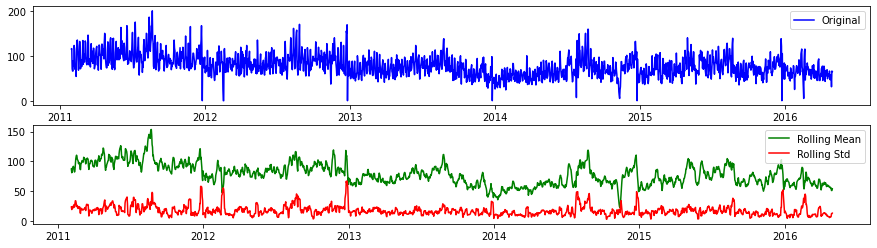

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(211)
plt.plot(df_final,color='b')
plt.legend(['Original'])
plt.subplot(212)
plt.plot(df_final.rolling(6).mean(),color='g')
plt.plot(df_final.rolling(6).std(),color='r')
plt.legend(['Rolling Mean','Rolling Std']);

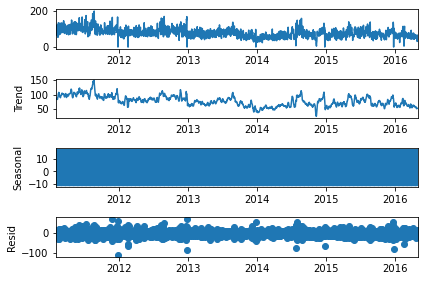

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_final, model='additive')  # model='add' also works
result.plot();

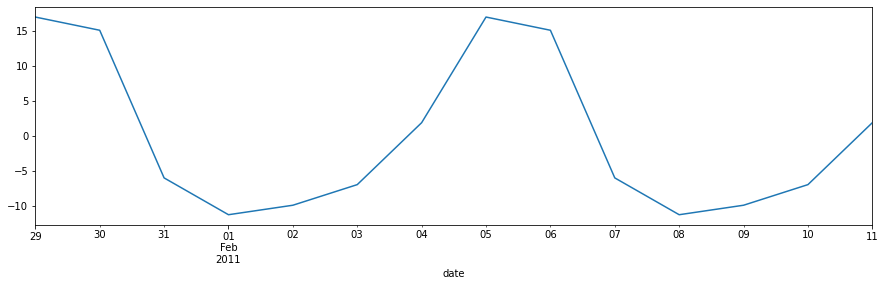

In [248]:
result.seasonal.iloc[:14].plot(figsize=(15,4));

In [249]:
# period=30
# m=int(len(df_final)/period)
# [i.std() for i in np.array_split(result.seasonal.values,m)]

### Augmented Dickey Fuller test for stationarity

In [250]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [251]:
adf_test(df_final)

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.602025
p-value                    0.005722
# lags used               26.000000
# observations          1892.000000
critical value (1%)       -3.433811
critical value (5%)       -2.863069
critical value (10%)      -2.567584
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [252]:
from pmdarima import auto_arima # for determining ARIMA orders

### Auto Arima without Seasonality

In [253]:
auto=auto_arima(df_final,seasonal=False)
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1919
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -8156.992
Date:                Fri, 09 Jul 2021   AIC                          16329.984
Time:                        23:05:31   BIC                          16374.456
Sample:                             0   HQIC                         16346.348
                               - 1919                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4774      0.021     71.379      0.000       1.437       1.518
ar.L2         -1.2115      0.032    -37.639      0.000      -1.275      -1.148
ar.L3          0.1375      0.032      4.256      0.000       0.074       0.201
ar.L4          0.0753      0.021      3.507      0.000       0.033       0.117
ma.L1         -2.1395      0.014   -158.000      0.000      -2.166      -2.113
ma.L2          2.0855      0.019    107.823      0.000       2.048       2.123
ma.L3         -0.8870      0.013    -67.997      0.000      -0.913      -0.861
sigma2       287.8991      5.944     48.437      0.000     276.249     299.549
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              1444.46
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.43
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [254]:
p,d,q=auto.order
print(p,d,q)

4 1 3


Augmented Dickey-Fuller Test: 
ADF test statistic     -1.320146e+01
p-value                 1.092308e-24
# lags used             2.600000e+01
# observations          1.891000e+03
critical value (1%)    -3.433813e+00
critical value (5%)    -2.863070e+00
critical value (10%)   -2.567584e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
None


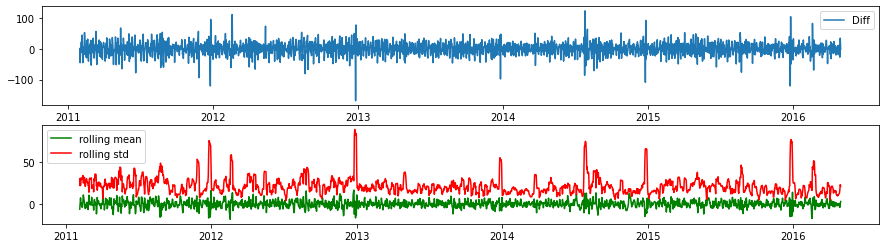

In [255]:
from statsmodels.tsa.statespace.tools import diff
if d>0:
    df_diff=diff(df_final,k_diff=d)
    plt.figure(figsize=(15,4))
    plt.subplot(211)
    plt.plot(df_diff)
    plt.legend(['Diff'])
    plt.subplot(212)
    plt.plot(df_diff.rolling(6).mean(),color='g')
    plt.plot(df_diff.rolling(6).std(),color='r')
    plt.legend(['rolling mean','rolling std']);
    print(adf_test(df_diff))

In [256]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [257]:
df_final['value']=df_final['value'].astype('float32')

In [258]:
df_final.shape

(1919, 1)

In [263]:
length=30
train=df_final[:-length]
test=df_final[-length:]
print(train.shape,test.shape)

(1889, 1) (30, 1)


In [264]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model=ARIMA(train,order=(p,d,q))
result=model.fit()
predictions=result.predict(start=len(train),end=(len(train)+len(test)-1),dynamic=False,typ='levels')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [265]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
models.append('ARIMA')
test_rmse.append(rmse)

Test RMSE: 10.151


In [266]:
model=ARIMA(df_final,order=auto.order)
result=model.fit()
forecast=result.predict(start=1,end=len(df_final)+length,dynamic=False,typ='levels')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [267]:
forecast.tail(1)

2016-05-31    48.089543
Freq: D, dtype: float64

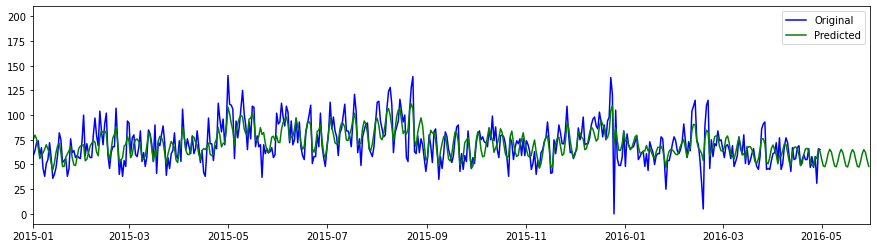

In [268]:
plt.figure(figsize=(15,4))
plt.plot(df_final,color='blue')
plt.plot(forecast.shift(-1),color='green')
plt.legend(['Original','Predicted'])
#plt.autoscale(axis='both',tight=True)
plt.xlim('2015-01-01','2016-05-31');


In [269]:
df_final.mean()

value    78.398643
dtype: float32

In [270]:
forecast.mean()

78.04716343941311

### Auto Arima with Seasonality

auto=auto_arima(df_final,seasonal=True,m=7)
auto.summary()

p,d,q=auto.order
print(p,d,q)

P,D,Q,m=auto.seasonal_order
print(P,D,Q,m)

from statsmodels.tsa.statespace.tools import diff
if d>0:
    df_diff=diff(df_final,k_diff=d)
    plt.figure(figsize=(15,4))
    plt.plot(df_diff)
    plt.plot(df_diff.rolling(6).mean(),color='g')
    plt.plot(df_diff.rolling(6).std(),color='r')
    plt.legend(['Diff','rolling mean','rolling std']);
    print(adf_test(df_diff))

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=auto.order,seasonal_order=auto.seasonal_order)
result=model.fit()
predictions=result.predict(start=len(train),end=(len(train)+len(test)-1),dynamic=False,typ='levels')

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
models.append('SARIMAX')
test_rmse.append(rmse)

model=SARIMAX(df_final,order=auto.order,seasonal_order=auto.seasonal_order)
result=model.fit()
forecast=result.predict(start=1,end=len(df_final)+length,dynamic=False,typ='levels')

forecast.tail(1)

plt.figure(figsize=(15,4))
plt.plot(df_final,color='blue')
plt.plot(forecast.shift(-1),color='green')
plt.legend(['Original','Predicted'])
#plt.autoscale(axis='both',tight=True)
plt.xlim('2015-01-01','2016-05-31');


df_final.mean()

forecast.mean()

## LSTM

In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [272]:
df_mm=scaler.fit_transform(df_final)
df_mm[:5]

array([[0.575     ],
       [0.58      ],
       [0.355     ],
       [0.32999998],
       [0.32999998]], dtype=float32)

In [273]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [274]:
# define generator
n_input = length
n_features = 1
generator = TimeseriesGenerator(df_mm, df_mm, length=n_input, batch_size=1)

In [275]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [276]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [277]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [278]:
# fit model
model.fit_generator(generator,epochs=10)

Epoch 1/10
1889/1889 [==============================] - 31s 12ms/step - loss: 0.0188
Epoch 2/10
1889/1889 [==============================] - 22s 11ms/step - loss: 0.0109
Epoch 3/10
1889/1889 [==============================] - 22s 11ms/step - loss: 0.0097
Epoch 4/10
1889/1889 [==============================] - 21s 11ms/step - loss: 0.0093
Epoch 5/10
1889/1889 [==============================] - 21s 11ms/step - loss: 0.0085
Epoch 6/10
1889/1889 [==============================] - 21s 11ms/step - loss: 0.0081
Epoch 7/10
1889/1889 [==============================] - 22s 11ms/step - loss: 0.0082
Epoch 8/10
1889/1889 [==============================] - 25s 13ms/step - loss: 0.0079
Epoch 9/10
1889/1889 [==============================] - 22s 11ms/step - loss: 0.0086
Epoch 10/10
1889/1889 [==============================] - 23s 12ms/step - loss: 0.0075 0s - loss: 0.00


In [279]:
model.history.history.keys()

dict_keys(['loss'])

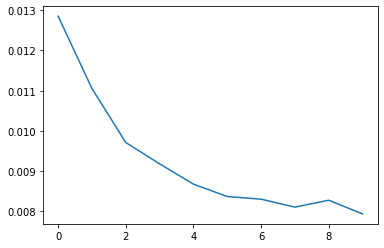

In [280]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [281]:
x,y=generator[0]
print(len(x[0]),y[0])

30 [0.405]


In [282]:
train_x=[i[0] for i in generator]
train_y=[i[1][0][0] for i in generator]
len(train_x)

1889

In [283]:
model.predict(train_x[0])[0][0]

0.55170846

In [284]:
test_x=train_x[-length:]
test_y=train_y[-length:]
print(len(test_x),len(test_y))

30 30


In [285]:
def prediction(i):
    return model.predict(i)[0][0]

test_pred=list(map(prediction,test_x))
len(test_pred)

30

In [286]:
predictions=scaler.inverse_transform(np.array(test_pred).reshape(-1,1))
predictions=predictions.reshape(1,len(test_y))[0]
print(len(predictions))
predictions[:5]

30


array([65.73609 , 74.12919 , 74.980064, 73.126114, 59.91994 ],
      dtype=float32)

In [287]:
length

30

In [288]:
df1=df_final.iloc[-length:]
df1.shape

(30, 1)

In [289]:
predictions=pd.DataFrame(predictions,index=df1.index,columns=['value'])
predictions.head()

,value
date,
2016-04-01,65.736092
2016-04-02,74.129189
2016-04-03,74.980064
2016-04-04,73.126114
2016-04-05,59.919941


In [290]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [291]:
rmse=sqrt(mean_squared_error(df1,predictions))
print(rmse)
models.append('LSTM')
test_rmse.append(rmse)

12.678431083777431


In [292]:
df1.mean()

value    58.866665
dtype: float32

In [293]:
predictions.mean()

value    64.851677
dtype: float32

### Forecasts

In [294]:
test_y=np.array(test_y).reshape(1,length,1)

In [295]:
model.predict(test_y)

array([[0.35193294]], dtype=float32)

In [296]:
for i in range(length):
    forecast=model.predict(test_y)
    test_y=np.append(test_y,forecast)
    test_y=test_y[1:]
    test_y=test_y.reshape(1,length,1)

In [297]:
forecast=scaler.inverse_transform(test_y[0][-length:].reshape(1,length))
forecast

array([[70.38659 , 67.020454, 60.615612, 58.30343 , 60.316658, 64.97195 ,
        73.484085, 80.311905, 77.089516, 67.60168 , 63.35621 , 64.63274 ,
        69.26209 , 77.43507 , 85.8184  , 84.746666, 74.5148  , 66.95168 ,
        66.62206 , 70.81284 , 77.87354 , 87.2939  , 90.337814, 82.04473 ,
        72.02873 , 68.63437 , 71.178215, 76.61402 , 86.07957 , 93.1579  ]],
      dtype=float32)

In [298]:
len(forecast[0])

30

In [299]:
start=df1.tail(1).index+pd.DateOffset(days=1)
end=df1.tail(1).index+pd.DateOffset(days=length)
end.values[0]

numpy.datetime64('2016-05-30T00:00:00.000000000')

In [300]:
forecast_index=pd.date_range(start.values[0],end.values[0]).rename('date')
len(forecast_index)

30

In [301]:
forecast=pd.DataFrame(forecast[0],columns=['values'],index=forecast_index)
forecast.head()

,values
date,
2016-05-01,70.386589
2016-05-02,67.020454
2016-05-03,60.615612
2016-05-04,58.303429
2016-05-05,60.316658


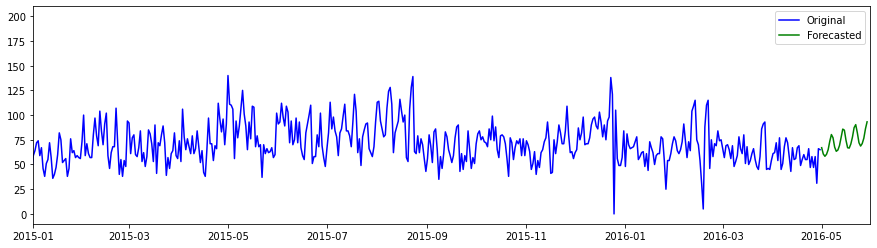

In [302]:
plt.figure(figsize=(15,4))
plt.plot(df_final,color='blue')
plt.plot(forecast.shift(-1),color='green')
plt.legend(['Original','Forecasted'])
#plt.autoscale(axis='both',tight=True)
plt.xlim('2015-01-01','2016-05-31');

## Holt-Winters Method

In [303]:
print(train.shape)
print(test.shape)

(1889, 1)
(30, 1)


In [304]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='add').fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [305]:
pred=fitted_model.forecast(length).rename('predictions')

In [306]:
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)
models.append('DES')
test_rmse.append(rmse)

10.344423984054679


In [307]:
fitted_model = ExponentialSmoothing(df_final,trend='add').fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [308]:
df_forecast_des=fitted_model.forecast(length).rename('Forecast')

### Triple Exponential Smoothing

In [309]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=length).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [310]:
pred=fitted_model.forecast(length).rename('predictions')

In [311]:
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)
models.append('TES')
test_rmse.append(rmse)

11.982821912165031


In [312]:
fitted_model = ExponentialSmoothing(df_final,trend='add',seasonal='add',seasonal_periods=length).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [313]:
df_forecast_tes=fitted_model.forecast(length).rename('Forecast')

## Facebook Prophet

In [ ]:
conda install libpython m2w64-toolchain -c msys2

In [ ]:
pip install pystan

In [ ]:
pip install fbprophet

In [314]:
from fbprophet import Prophet

In [315]:
df_final=df_final.reset_index()
df_final.head()

,date,value
0,2011-01-29,115.0
1,2011-01-30,116.0
2,2011-01-31,71.0
3,2011-02-01,66.0
4,2011-02-02,66.0


In [316]:
df_final.columns = ['ds','y']

In [317]:
train=df_final[:-length]
test=df_final[-length:]

In [318]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=length)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [319]:
pred=forecast[-length:]['yhat']

In [320]:
rmse=sqrt(mean_squared_error(test['y'],pred))
print(rmse)
models.append('Prophet')
test_rmse.append(rmse)

18.30418095824715


In [321]:
m = Prophet()
m.fit(df_final)
future = m.make_future_dataframe(periods=length)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [322]:
df_forecast=forecast[['ds','yhat']]

In [323]:
df_forecast=df_forecast.set_index('ds')
df_final=df_final.set_index('ds')

In [324]:
df_forecast=df_forecast.asfreq('D')
df_final=df_final.asfreq('D')

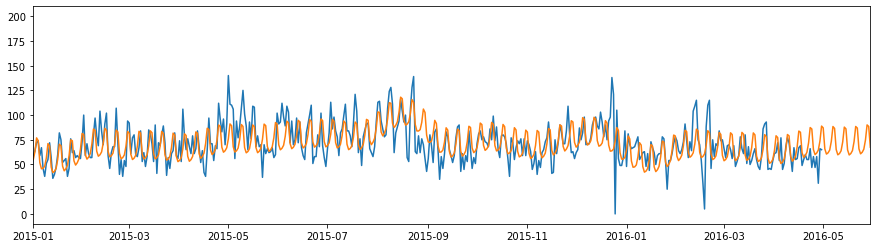

In [325]:
plt.figure(figsize=(15,4))
plt.plot(df_final)
plt.plot(df_forecast)
plt.xlim('2015-01-01','2016-05-30');

## RMSE Comparisons

In [328]:
rmse_comp=pd.DataFrame(zip(models,test_rmse),columns=['Models','RMSE'])
rmse_comp.sort_values(by=['RMSE'])

,Models,RMSE
0,ARIMA,10.151405
2,DES,10.344424
1,LSTM,11.291492
3,TES,11.982822
7,LSTM,12.678431
4,Prophet,18.304181
